# in the name of Allah


# Diagnosis of Measles Disease Using Image Processing in children under five Afghan children



## the library we are using for this project.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten ,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import imgaug.augmenters as iaa
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


In [2]:
import tensorflow as tf

In [3]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
#train_image = []
#train_label =[]
#img_size =100

#for dir_path in glob.glob('../dataset/measles/train/*'):
    #label =dir_path.split('\\')[-1]
    #for img_path in os.listdir(dir_path):
        #imgpath =os.path.join(dir_path,img_path)
        #img =cv2.imread(imgpath,cv2.IMREAD_GRAYSCALE)
        #img1 =cv2.resize(img,(img_size,img_size))
        #train_image.append(img)
        #train_label.append(label)


# Spliting Data to train ,test and val and labeling them

In [5]:
import splitfolders

In [6]:
import splitfolders
#input_folder = "F:/final_project_material/dataset/measles/train/"
#splitfolders.ratio(input_folder,output='../dataset/measles/',
                   #seed=42,ratio=(.7,.2,.1),group_prefix=None)
print("done Your data has been splited")

done Your data has been splited


## Rescaling the dataset

In [7]:
train =ImageDataGenerator(rescale=1/255)
validatoin = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1/255)

In [8]:
train_data = train.flow_from_directory('../dataset/measles/train',
                                      target_size = (224, 224),
                                     classes =['measles','monkeypox','normal','other'],
                                      batch_size =5,)

validation_data = validatoin.flow_from_directory('../dataset/measles/val',
                                      target_size = (224, 224),
                                    classes =['measles','monkeypox','normal','other'],
                                                 batch_size =5,)

test_data = train.flow_from_directory('../dataset/measles/test',
                                       target_size = (224, 224),
                                    classes =['measles','monkeypox','normal','other'],
                                      batch_size =10,)

Found 809 images belonging to 4 classes.
Found 230 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


# Making xtrain and ytrain for SVM & KNN

In [9]:
y=np.concatenate([train_data.next()[1] for i in range(train_data.__len__())])
x=np.concatenate([train_data.next()[0] for i in range(train_data.__len__())])




In [10]:
xtrain ,ytrain =train_data.next()

In [11]:
print(len(x))
print(len(y))

809
809


In [12]:
labels=[]
for label in y:
    labels.append(np.argmax(label))
print(len(labels))
x =x.reshape(len(x),-1)

print(x.shape)


809
(809, 150528)


# Classification via SVM

In [13]:
from sklearn.svm import SVC
model=SVC(C=1,kernel ='poly',gamma='auto')
model.fit(x,labels)

SVC(C=1, gamma='auto', kernel='poly')

# Making xtest and ytest fro SVM & KNN

In [14]:
ty=np.concatenate([validation_data.next()[1] for i in range(validation_data.__len__())])
tx=np.concatenate([validation_data.next()[0] for i in range(validation_data.__len__())])


In [15]:
tlabels=[]
for label in ty:
    tlabels.append(np.argmax(label))
print(len(tlabels))
tx =tx.reshape(len(tx),-1)

print(tx.shape)


230
(230, 150528)


In [16]:

y_pred = model.predict(tx)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(tlabels,y_pred))
print(classification_report(tlabels,y_pred))
print(accuracy_score(tlabels,y_pred))

[[  0   0  38   0]
 [  0   0  55   0]
 [  0   0 105   0]
 [  0   0  32   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00        55
           2       0.46      1.00      0.63       105
           3       0.00      0.00      0.00        32

    accuracy                           0.46       230
   macro avg       0.11      0.25      0.16       230
weighted avg       0.21      0.46      0.29       230

0.45652173913043476


C:\Users\hamid\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamid\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamid\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification via KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(x,labels)

KNeighborsClassifier(n_neighbors=7)

In [20]:
y_pred = knn.predict(tx)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(tlabels,y_pred))
print(classification_report(tlabels,y_pred))
print(accuracy_score(tlabels,y_pred))

[[ 8  5 24  1]
 [ 8  4 41  2]
 [16 29 58  2]
 [ 4  4 24  0]]
              precision    recall  f1-score   support

           0       0.22      0.21      0.22        38
           1       0.10      0.07      0.08        55
           2       0.39      0.55      0.46       105
           3       0.00      0.00      0.00        32

    accuracy                           0.30       230
   macro avg       0.18      0.21      0.19       230
weighted avg       0.24      0.30      0.27       230

0.30434782608695654


In [22]:
classes= ['measles','monkeypox','normal','other']



# Ploting the images

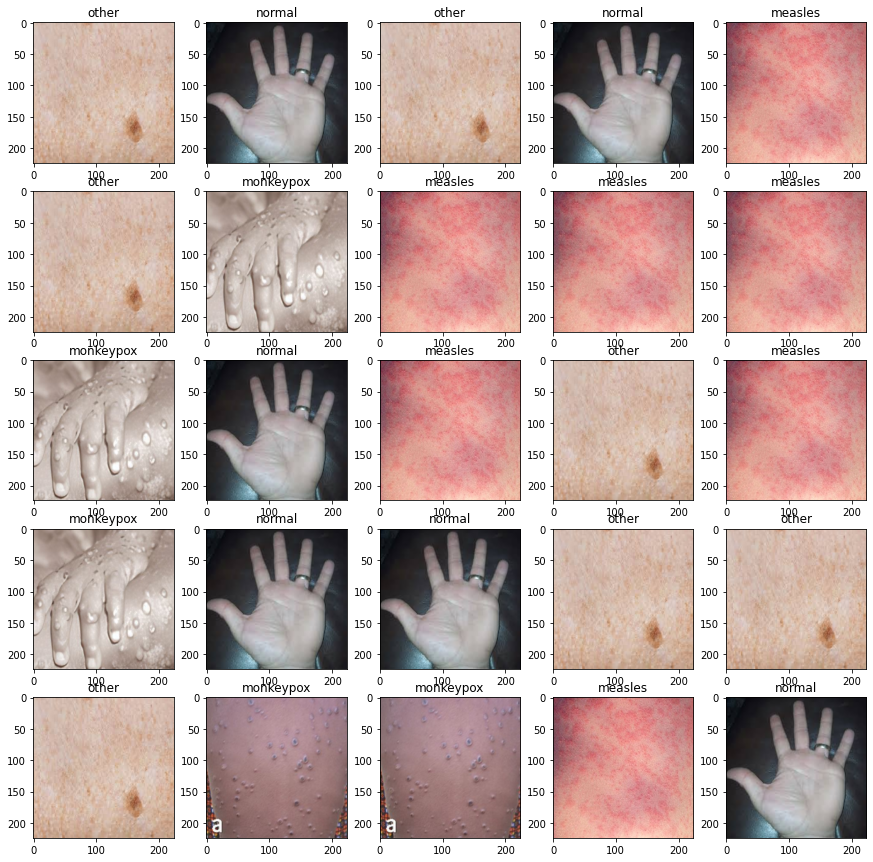

In [23]:
plt.figure(figsize =(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    random_num =np.random.randint(0,len(xtrain))
    plt.imshow(xtrain[random_num])
    plt.title(classes[np.argmax(ytrain[random_num])])
   
 


# Classification via CNN

In [24]:

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten ,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping


In [25]:
INPUT_SHAPE =(224,224,3)
model =Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),
                                 activation='relu',padding='same',
                                 input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),
                                 strides=(1,1),activation='relu',
                                 padding='same',input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model.add(tf.keras.layers.Flatten(input_shape =(224,224,3)))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics =['accuracy']
)
es = EarlyStopping(monitor='val_loss', min_delta=0, mode='auto', verbose=0,
 patience=7,baseline=None,restore_best_weights =True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [27]:
batch_size= 50
history = model.fit(train_data,
                              epochs=6,
                              #steps_per_epoch =  809// batch_size,
                              validation_data=validation_data,
                              callbacks =[es]
                              #validation_steps = 230// batch_size,
                            )

Epoch 1/6
162/162 [==============================] - 87s 483ms/step - loss: 2.0467 - accuracy: 0.4462 - val_loss: 1.2082 - val_accuracy: 0.4652
Epoch 2/6
162/162 [==============================] - 149s 925ms/step - loss: 1.0484 - accuracy: 0.5550 - val_loss: 1.2000 - val_accuracy: 0.4435
Epoch 3/6
162/162 [==============================] - 199s 1s/step - loss: 0.6932 - accuracy: 0.7367 - val_loss: 1.1642 - val_accuracy: 0.5739
Epoch 4/6
162/162 [==============================] - 157s 967ms/step - loss: 0.3940 - accuracy: 0.8591 - val_loss: 1.4543 - val_accuracy: 0.5130
Epoch 5/6
162/162 [==============================] - 151s 933ms/step - loss: 0.2991 - accuracy: 0.8962 - val_loss: 1.9228 - val_accuracy: 0.5609
Epoch 6/6
162/162 [==============================] - 160s 989ms/step - loss: 0.2310 - accuracy: 0.9234 - val_loss: 1.6989 - val_accuracy: 0.6087


In [28]:
test =model.evaluate(test_data)

13/13 [==============================] - 8s 599ms/step - loss: 1.6841 - accuracy: 0.6281


<AxesSubplot:>

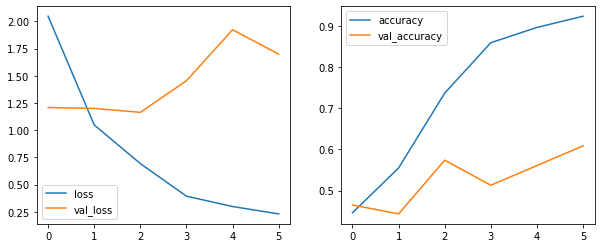

In [29]:
fig, ax =plt.subplots(1,2,figsize =(10,4))
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(kind='line',ax =ax[0])
history_df[['accuracy','val_accuracy']].plot(kind='line',ax=ax[1])

In [30]:
y=np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])
true_labels=np.argmax(y, axis=-1)

prediction= model.predict(test_data, verbose=2)
prediction=np.argmax(prediction, axis=-1)

13/13 - 9s - 9s/epoch - 672ms/step


In [31]:
y=np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])


In [32]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='weighted')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='weighted')
print('F-Measure: %.3f' % score)

Accuracy: 0.628
Precision: 0.708
Recall: 0.628
F-Measure: 0.625


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)
print(cm)
cr = classification_report(y_true=true_labels, y_pred=prediction)
print(cr)

[[13  1  5  1]
 [ 9 11  8  1]
 [ 7  3 40  4]
 [ 2  1  3 12]]
              precision    recall  f1-score   support

           0       0.42      0.65      0.51        20
           1       0.69      0.38      0.49        29
           2       0.71      0.74      0.73        54
           3       0.67      0.67      0.67        18

    accuracy                           0.63       121
   macro avg       0.62      0.61      0.60       121
weighted avg       0.65      0.63      0.63       121



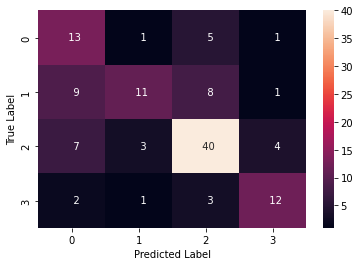

<Figure size 432x288 with 0 Axes>

In [34]:
cm = confusion_matrix(true_labels, prediction)
sns.heatmap(cm, fmt='4',annot=True).set(ylabel="True Label", xlabel="Predicted Label")
plt.show()
plt.savefig('confusion_matrix.jpg')

In [35]:
from joblib import dump
dump(model,'../../../measles/mlmodels/model.joblib')

INFO:tensorflow:Assets written to: ram://4d1bd882-8c14-4ee2-9ffb-3d5dfd8ee1d2/assets


INFO:tensorflow:Assets written to: ram://4d1bd882-8c14-4ee2-9ffb-3d5dfd8ee1d2/assets


['../../../measles/mlmodels/model.joblib']

In [37]:
model.save('../mlmodel/model.h5py')
from keras.models import load_model

models = load_model('../mlmodel/model.h5py')

INFO:tensorflow:Assets written to: ../mlmodel/model.h5py\assets


INFO:tensorflow:Assets written to: ../mlmodel/model.h5py\assets


In [38]:
from tensorflow.keras.preprocessing import image

In [39]:
imp_pred =image.load_img('../dataset/measles/train/normal/normal16.png' )
imp_pred = img_to_array(imp_pred)

imp_pred =imp_pred/255
imp_pred = imp_pred.reshape(1,224,224,3)
result = models.predict(imp_pred)
print(result[0][2])

1/1 [==============================] - 1s 766ms/step
0.9981389


In [40]:
classes =['measles','monkeypox','normal','other']

# Classification via Transfer learning(ResNet50)

In [53]:
resnet_model =Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top = False,input_shape=(244,244,3),pooling='avg',classes=4,weights='imagenet')
for layer in pretrained_model.layers:
    resnet_modelelelelelnable =False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(4,activation ="softmax"))
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 24,585,732
Non-trainable params: 53,120
_________________________________________________________________


In [54]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics =['accuracy']
)
history = model.fit(train_data,
                              epochs=6,
                              #steps_per_epoch =  809// batch_size,
                              validation_data=validation_data,
                              #callbacks =[es]
                              #validation_steps = 230// batch_size,
                            )

Epoch 1/6
162/162 [==============================] - 193s 1s/step - loss: 0.1328 - accuracy: 0.9518 - val_loss: 2.2181 - val_accuracy: 0.6000
Epoch 2/6
162/162 [==============================] - 158s 977ms/step - loss: 0.0848 - accuracy: 0.9679 - val_loss: 2.7004 - val_accuracy: 0.5783
Epoch 3/6
162/162 [==============================] - 150s 926ms/step - loss: 0.1041 - accuracy: 0.9580 - val_loss: 3.1858 - val_accuracy: 0.5217
Epoch 4/6
162/162 [==============================] - 133s 820ms/step - loss: 0.1827 - accuracy: 0.9506 - val_loss: 3.2552 - val_accuracy: 0.5696
Epoch 5/6
162/162 [==============================] - 72s 447ms/step - loss: 0.1119 - accuracy: 0.9679 - val_loss: 3.3146 - val_accuracy: 0.5739
Epoch 6/6
162/162 [==============================] - 72s 442ms/step - loss: 0.1254 - accuracy: 0.9604 - val_loss: 3.8850 - val_accuracy: 0.5609


In [55]:
test =model.evaluate(test_data)

13/13 [==============================] - 3s 223ms/step - loss: 3.5046 - accuracy: 0.5702
